In [1]:
#read in the 
#import packages
import numpy as np
import json 
import scanpy as sc
from collections import OrderedDict
import scipy 
import pandas as pd
import matplotlib.pyplot as plt

#spectra imports 
import Spectra as spc
from Spectra import Spectra_util as spc_tl
from Spectra import K_est as kst
from Spectra import default_gene_sets
import anndata as ad


In [2]:
#form a location
loc="alt-prom-crispr-fiveprime/"
#load adata 
adata  = ad.read_h5ad(loc+"files/adata_normalised_cellcycle.h5ad")
adata.X=adata.layers["log1p"]

In [3]:
annotations = spc.default_gene_sets.load()
#fit the model (We will run this with only 2 epochs to decrease runtime in this tutorial)
model_global = spc.est_spectra(adata = adata, gene_set_dictionary = annotations['global'], # because we do not use the cell types
                                                                                    # we will supply a regular dict
                                                                                    # instead of the nested dict above
                        use_highly_variable = True, cell_type_key =None, #"cell_type_annotations" ,
                        use_weights = True, lam = 0.1, 
                        delta=0.001,
                        kappa = None , #change to None 0.00001
                        rho = 0.001, #rho 0.00001
                        use_cell_types = False, #set to False to not use the cell type annotations
                        n_top_vals = 25,  #number set to 50
                        clean_gs=True,
                        label_factors=True,
                        num_epochs=10000,
                        overlap_threshold=0.2,
                        min_gs_num = 3
                       )

Cell type labels in gene set annotation dictionary and AnnData object are identical
removing gene set all_Beta-Ala_metabolism for cell type global which is of length 7 2 genes are found in the data. minimum length is 3
removing gene set all_ascorbate-uptake for cell type global which is of length 3 2 genes are found in the data. minimum length is 3
Your gene set annotation dictionary is now correctly formatted.


100%|██████████| 10000/10000 [2:05:26<00:00,  1.33it/s]    
/Users/helenking/anaconda3/envs/apu/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'BTD' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = id2word[idx_matrix[i,j]]
/Users/helenking/anaconda3/envs/apu/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'HLCS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = id2word[idx_matrix[i,j]]
/Users/helenking/anaconda3/envs/apu/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TECR' has 

In [4]:
# KeyError: "Could not find 'umap' or 'X_umap' in .obsm"
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/helenking/anaconda3/envs/apu/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
dataframe_spectra=pd.DataFrame(adata.obsm["SPECTRA_cell_scores"], index=adata.obs_names, columns=adata.uns["SPECTRA_overlap"].index)
dataframe_spectra_columns=adata.uns["SPECTRA_overlap"].index
#subset the dataframe for the cellbarcodes of ESR1_P1 ESR1_P2 and nontargeting
gene="ESR1"


In [11]:
dataframe_spectra

0-X-global-X-all_biotin_metabolism  \
GTGTGCGGTTAGTGGG-1                        9.237579e-03   
TCAGATGAGCATCATC-1                        7.051101e-09   
GCAATCACACGACGAA-1                        2.167318e-03   
CACACAAAGCTGCAAG-1                        1.413153e-03   
AGGCCACTCTTACCTA-1                        1.927258e-10   
...                                                ...   
TAGCCGGAGCGTAATA-1                        7.170779e-11   
CTTGGCTTCAGCTTAG-1                        2.476367e-03   
CATATGGAGGTGTTAA-1                        2.570778e-03   
TCTCTAAAGGAGCGTT-1                        1.391553e-03   
GGGAATGTCTTGACGA-1                        2.001940e-10   

                    1-X-global-X-all_purine_synthesis  \
GTGTGCGGTTAGTGGG-1                       4.053838e-04   
TCAGATGAGCATCATC-1                       1.662875e-04   
GCAATCACACGACGAA-1                       3.691382e-04   
CACACAAAGCTGCAAG-1                       3.007432e-04   
AGGCCACTCTTACCTA-1                       2.121895e-04   
...                                               ...   
TAGCCGGAGCGTAATA-1                       7.430381e-07   
CTTGGCTTCAGCTTAG-1                       2.263839e-04   
CATATGGAGGTGTTAA-1                       2.000376e-04   
TCTCTAAAGGAGCGTT-1                       3.627104e-04   
GGGAATGTCTTGACGA-1                       2.734928e-04   

                    2-X-global-X-all_ethanol_metabolism  \
GTGTGCGGTTAGTGGG-1                         4.750246e-11   
TCAGATGAGCATCATC-1                         5.717598e-04   
GCAATCACACGACGAA-1                         4.885835e-11   
CACACAAAGCTGCAAG-1                         1.872481e-03   
AGGCCACTCTTACCTA-1                         1.418944e-03   
...                                                 ...   
TAGCCGGAGCGTAATA-1                         1.470620e-03   
CTTGGCTTCAGCTTAG-1                         1.547956e-03   
CATATGGAGGTGTTAA-1                         1.210368e-03   
TCTCTAAAGGAGCGTT-1                         9.115024e-11   
GGGAATGTCTTGACGA-1                         1.260464e-03   

                    3-X-global-X-all_amino-sugar-nucleotide-sugar_metabolism  \
GTGTGCGGTTAGTGGG-1                                       5.322683e-04          
TCAGATGAGCATCATC-1                                       1.144720e-04          
GCAATCACACGACGAA-1                                       3.279115e-04          
CACACAAAGCTGCAAG-1                                       3.030962e-04          
AGGCCACTCTTACCTA-1                                       3.032002e-08          
...                                                               ...          
TAGCCGGAGCGTAATA-1                                       7.200462e-09          
CTTGGCTTCAGCTTAG-1                                       4.779655e-04          
CATATGGAGGTGTTAA-1                                       2.292907e-04          
TCTCTAAAGGAGCGTT-1                                       1.524916e-04          
GGGAATGTCTTGACGA-1                                       5.065035e-04          

                    4-X-global-X-all_steroid_metabolism  \
GTGTGCGGTTAGTGGG-1                         5.557497e-09   
TCAGATGAGCATCATC-1                         3.238609e-04   
GCAATCACACGACGAA-1                         4.265923e-04   
CACACAAAGCTGCAAG-1                         2.353136e-04   
AGGCCACTCTTACCTA-1                         7.462370e-04   
...                                                 ...   
TAGCCGGAGCGTAATA-1                         2.873440e-04   
CTTGGCTTCAGCTTAG-1                         3.421056e-08   
CATATGGAGGTGTTAA-1                         3.842223e-04   
TCTCTAAAGGAGCGTT-1                         2.003262e-08   
GGGAATGTCTTGACGA-1                         2.395792e-04   

                    5-X-global-X-all_carnitine-shuttle  \
GTGTGCGGTTAGTGGG-1                        4.248724e-10   
TCAGATGAGCATCATC-1                        1.071320e-04   
GCAATCACACGACGAA-1                        1.508868e-04   
CACACAAAGCTGCAAG-1         

In [6]:
adata.obs["target"]=adata.obs["guide_id"].str.split("_").str.get(0)
#get a list of genes 
gene_list = adata.obs["target"][(adata.obs["guide_id"].str.endswith("AP"))&(adata.obs["guide_id"]!="non-targeting_Control")].drop_duplicates().values

In [21]:
dataframe_spectra_gene.columns[dataframe_spectra_gene.columns.str.endswith("transition")]

Index(['12-X-global-X-all_G2M-transition', '80-X-global-X-all_G1S-transition'], dtype='object')

In [22]:
#subselect only the the index beginning with 10 and 79
#subset esr1 transtion
dataframe_spectra_gene=dataframe_spectra.merge(adata.obs, left_index=True, right_index=True)
dataframe_spectra_gene_sub=dataframe_spectra_gene[["guide_id","target","guide_identity",'12-X-global-X-all_G2M-transition','80-X-global-X-all_G1S-transition']]
dataframe_spectra_gene_sub_sub=dataframe_spectra_gene_sub[dataframe_spectra_gene_sub["guide_id"].isin(["ESR1_AP","ESR1_MP","non-targeting_Control"])].reset_index(drop=True)
dataframe_spectra_gene_sub_sub["guide_id"]=dataframe_spectra_gene_sub_sub["guide_id"].astype(str)
dataframe_spectra_gene_sub_melt=pd.melt(dataframe_spectra_gene_sub_sub, id_vars=["guide_id","target","guide_identity"], value_vars=['12-X-global-X-all_G2M-transition','80-X-global-X-all_G1S-transition'])


In [23]:
dataframe_spectra_gene.columns[dataframe_spectra_gene.columns.str.contains("guide")]

Index(['guide_identity', 'guide_read_count', 'guide_UMI_count',
       'guide_coverage', 'guide_target', 'num_guides', 'ideal_guide',
       'correct_num_guides', 'guide_no', 'guide_id', 'guide_assignment'],
      dtype='object')

<Axes: xlabel='variable', ylabel='value'>

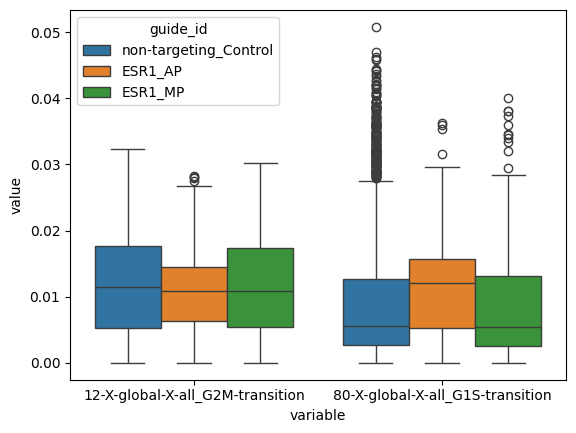

In [25]:
import seaborn as sns
sns.boxplot(data=dataframe_spectra_gene_sub_melt, hue="guide_id", y="value", x="variable")
#check the statistically difference 


In [27]:
import scipy
a=dataframe_spectra_gene_sub_melt["value"][(dataframe_spectra_gene_sub_melt["guide_id"]=="ESR1_MP")&(dataframe_spectra_gene_sub_melt["variable"]=="12-X-global-X-all_G2M-transition")]
b=dataframe_spectra_gene_sub_melt["value"][(dataframe_spectra_gene_sub_melt["guide_id"]=="ESR1_AP")&(dataframe_spectra_gene_sub_melt["variable"]=="12-X-global-X-all_G2M-transition")]
stat, pvalue = scipy.stats.ttest_ind(a, b)
pvalue

# sns.boxplot(data=dataframe_spectra_gene_sub, x="variable", y="value", hue="guide_id")


0.1393351839024466

In [28]:
#   and calculate the  variance per  column
dataframe_spectra_five=dataframe_spectra.var(axis=0).sort_values(ascending=False).head(5)
#calculate the median value of p1 

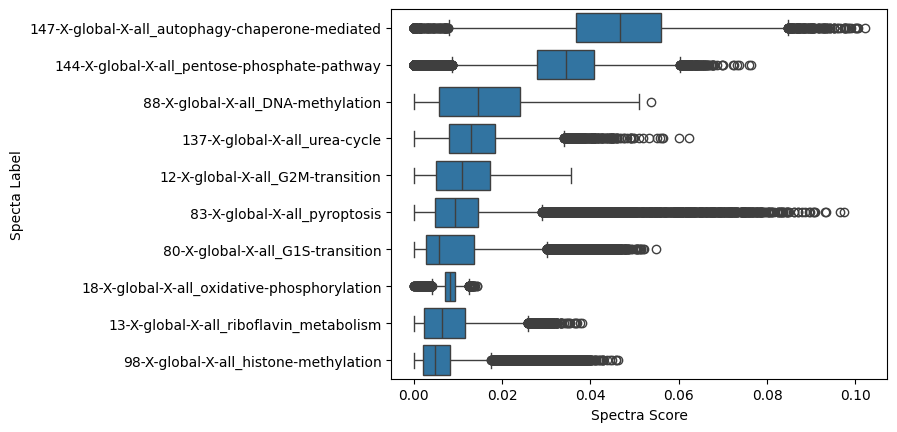

In [59]:
#plot boxplot of the top 8 gene ontology
#remove columns that end with X-7 or X-124
dataframe_spectra_boxplot=dataframe_spectra[dataframe_spectra[dataframe_spectra.columns[~dataframe_spectra.columns.str.contains("132|148|25|22|28|39|114")]].mean(axis=0).sort_values(ascending=False).head(10).index].melt()
dataframe_spectra_boxplot.to_csv(loc+"files/spectra_boxplot.csv")
# dataframe_spectra_boxplot=dataframe_spectra[dataframe_spectra.mean(axis=0).sort_values(ascending=False).head(8).index].melt()
sns.boxplot(data=dataframe_spectra_boxplot, y="variable", x="value")
plt.xlabel("Spectra Score")
plt.ylabel("Specta Label")
#make prettier
plt.savefig(loc+"figures/spectra_boxplot.pdf", dpi=300, bbox_inches="tight")

In [30]:
#cellcycle 
cellcycle=["12-X-global-X-all_G2M-transition","80-X-global-X-all_G1S-transition"]

In [31]:
mean_df_list=[]
corr_list=[]
for gene in gene_list:
    gene_adata=adata[adata.obs["guide_id"].isin([gene+"_MP",gene+"_AP"]),:]
    dataframe_spectra_gene=dataframe_spectra.merge(gene_adata.obs, left_index=True, right_index=True)
    min_cells=min(dataframe_spectra_gene.groupby("guide_id").size())
    dataframe_spectra_gene_guide=dataframe_spectra_gene.groupby("guide_id")[dataframe_spectra_columns].apply(lambda x: x.sample(min_cells))
    dataframe_spectra_gene_guide.index
    p1=dataframe_spectra_gene_guide.iloc[dataframe_spectra_gene_guide.index.get_level_values('guide_id') == gene+"_AP"].reset_index(drop=True)
    p2=dataframe_spectra_gene_guide.iloc[dataframe_spectra_gene_guide.index.get_level_values('guide_id') == gene+"_MP"].reset_index(drop=True)
    ##create a new column with gene name and the correlation across all the columns
    mean_df_p1=pd.DataFrame(p1[cellcycle].mean(axis=0))
    mean_df_p1.columns=[gene+"_P1"]
    mean_df_p2=pd.DataFrame(p2[cellcycle].mean(axis=0))
    mean_df_p2.columns=[gene+"_P2"] 
    #merge together
    mean_df=mean_df_p1.merge(mean_df_p2, left_index=True, right_index=True)
    mean_df_list.append(mean_df)
    correlation_df=pd.DataFrame(p1.corrwith(p2,method="spearman" ))
    correlation_df.columns=[gene]
    corr_list.append(correlation_df)
    # df.groupby('ID')[['Val1','Val2']].corr().iloc[0::2,-1]

/var/folders/r_/bqnt2f_d6919cz7v1yzx2ykc0000gn/T/ipykernel_32712/4170490404.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_cells=min(dataframe_spectra_gene.groupby("guide_id").size())
/var/folders/r_/bqnt2f_d6919cz7v1yzx2ykc0000gn/T/ipykernel_32712/4170490404.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe_spectra_gene_guide=dataframe_spectra_gene.groupby("guide_id")[dataframe_spectra_columns].apply(lambda x: x.sample(min_cells))
/var/folders/r_/bqnt2f_d6919cz7v1yzx2ykc0000gn/T/ipykernel_32712/4170490404.py:6: FutureWarning: The default of observed=False is deprecated and will be change

In [32]:
corr_df=pd.concat(corr_list, axis=1)
mean_df=pd.concat(mean_df_list, axis=1)

In [33]:
#melt with index values
mean_df_melt=mean_df.reset_index().melt(id_vars="index")
mean_df_melt["gene"]=mean_df_melt["variable"].str.split("_").str.get(0)
mean_df_melt["promoter"]=mean_df_melt["variable"].str.split("_").str.get(1)

In [35]:
mean_df_melt_10_pivot=pd.pivot_table(mean_df_melt[mean_df_melt["index"]=="12-X-global-X-all_G2M-transition"], values="value", index="gene", columns="promoter")
mean_df_melt_70_pivot=pd.pivot_table(mean_df_melt[mean_df_melt["index"]=="80-X-global-X-all_G1S-transition"], values="value", index="gene", columns="promoter")


In [36]:
#read in the significant genes from edistance 
# files/significant_genes.csv
significant_genes=pd.read_csv(loc+"files/significant_genes.csv")

In [37]:
%%capture
mean_df_melt_10_pivot_sub=mean_df_melt_10_pivot[mean_df_melt_10_pivot.index.isin(significant_genes["gene"])]
mean_df_melt_10_pivot_sub.loc[:,"diff"]=(mean_df_melt_10_pivot_sub.loc[:,"P2"]-mean_df_melt_10_pivot_sub.loc[:,"P1"]).abs()
mean_df_melt_10_pivot_sub=mean_df_melt_10_pivot_sub.sort_values("diff", ascending=False)
#repeat for mean_df_melt_70_pivot
mean_df_melt_70_pivot_sub=mean_df_melt_70_pivot[mean_df_melt_70_pivot.index.isin(significant_genes["gene"])]
mean_df_melt_70_pivot_sub.loc[:,"diff"]=(mean_df_melt_70_pivot_sub.loc[:,"P2"]-mean_df_melt_70_pivot_sub.loc[:,"P1"]).abs()
mean_df_melt_70_pivot_sub=mean_df_melt_70_pivot_sub.sort_values("diff", ascending=False)

In [70]:
#put the two mean_df_melt_10_pivot_sub and mean_df_melt_70_pivot_sub into file
mean_df_melt_10_pivot_sub[["P1","P2"]][mean_df_melt_10_pivot_sub.index.isin(significant_genes["gene"][significant_genes["successfulKD"]==True])].to_csv(loc+"files/mean_df_melt_10_pivot_sub.csv")
mean_df_melt_70_pivot_sub[["P1","P2"]][mean_df_melt_70_pivot_sub.index.isin(significant_genes["gene"][significant_genes["successfulKD"]==True])].to_csv(loc+"files/mean_df_melt_70_pivot_sub.csv")

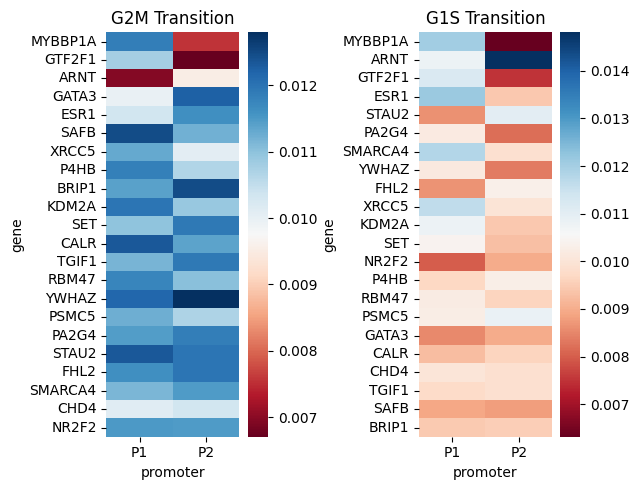

In [39]:
#plot two heatmaps one for index=10-X-global-X-all_G2M-transition
#two plots side by side
fig, axs = plt.subplots(ncols=2)
#make larger 
fig.set_figheight(5)
#make text smaller
sns.heatmap(mean_df_melt_10_pivot_sub[["P1","P2"]][mean_df_melt_10_pivot_sub.index.isin(significant_genes["gene"])],cmap="RdBu",ax=axs[0])
#make text smaller and the size of plot smaller 
sns.heatmap(mean_df_melt_70_pivot_sub[["P1","P2"]][mean_df_melt_70_pivot_sub.index.isin(significant_genes["gene"])],cmap="RdBu",ax=axs[1])
#make sma\
#title LHS   B21E54  EE3968 7C53A2 33669A 3A54A5
axs[0].set_title("G2M Transition")
#title RHS
axs[1].set_title("G1S Transition")
fig.tight_layout()
plt.savefig(loc+"figures/spectra_heatmap_G2M.pdf", dpi=300, bbox_inches="tight")

In [ ]:
#s

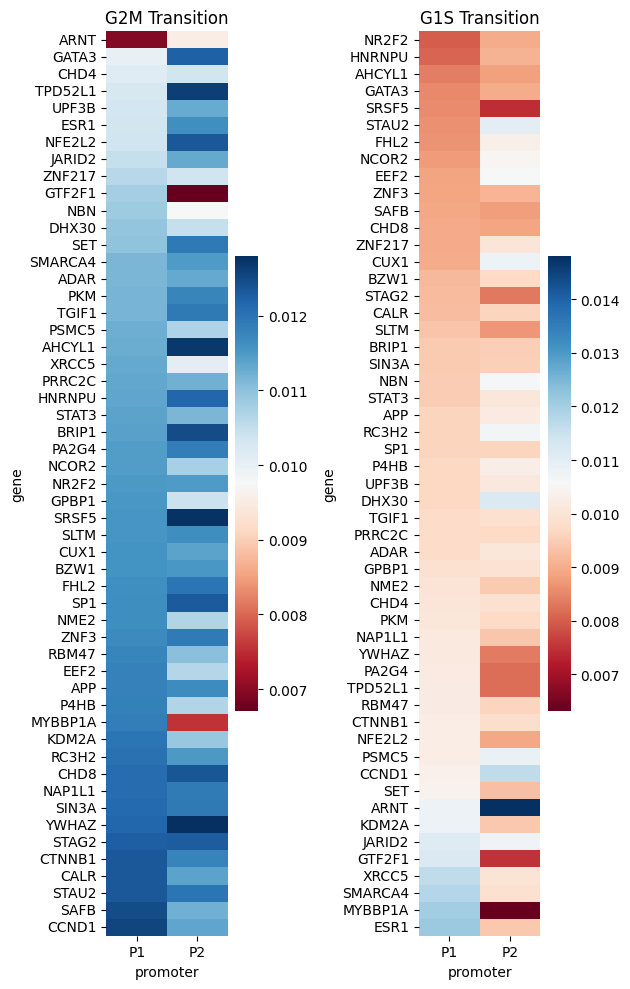

In [40]:
#sort according to the mean of the P1
mean_df_melt_10_pivot=mean_df_melt_10_pivot.sort_values(by="P1", ascending=True)
mean_df_melt_70_pivot=mean_df_melt_70_pivot.sort_values(by="P1", ascending=True)
#plot two heatmaps one for index=10-X-global-X-all_G2M-transition
#two plots side by side
fig, axs = plt.subplots(ncols=2)
#make larger 
fig.set_figheight(10)
#make text smaller
sns.heatmap(mean_df_melt_10_pivot,cmap="RdBu",ax=axs[0])
#make text smaller and the size of plot smaller 
sns.heatmap(mean_df_melt_70_pivot, cmap="RdBu",ax=axs[1])
#make sma\
#title LHS
axs[0].set_title("G2M Transition")
#title RHS
axs[1].set_title("G1S Transition")
fig.tight_layout()
plt.savefig(loc+"figures/spectra_heatmap_G2M.pdf", dpi=300, bbox_inches="tight")

<Axes: xlabel='value', ylabel='variable'>

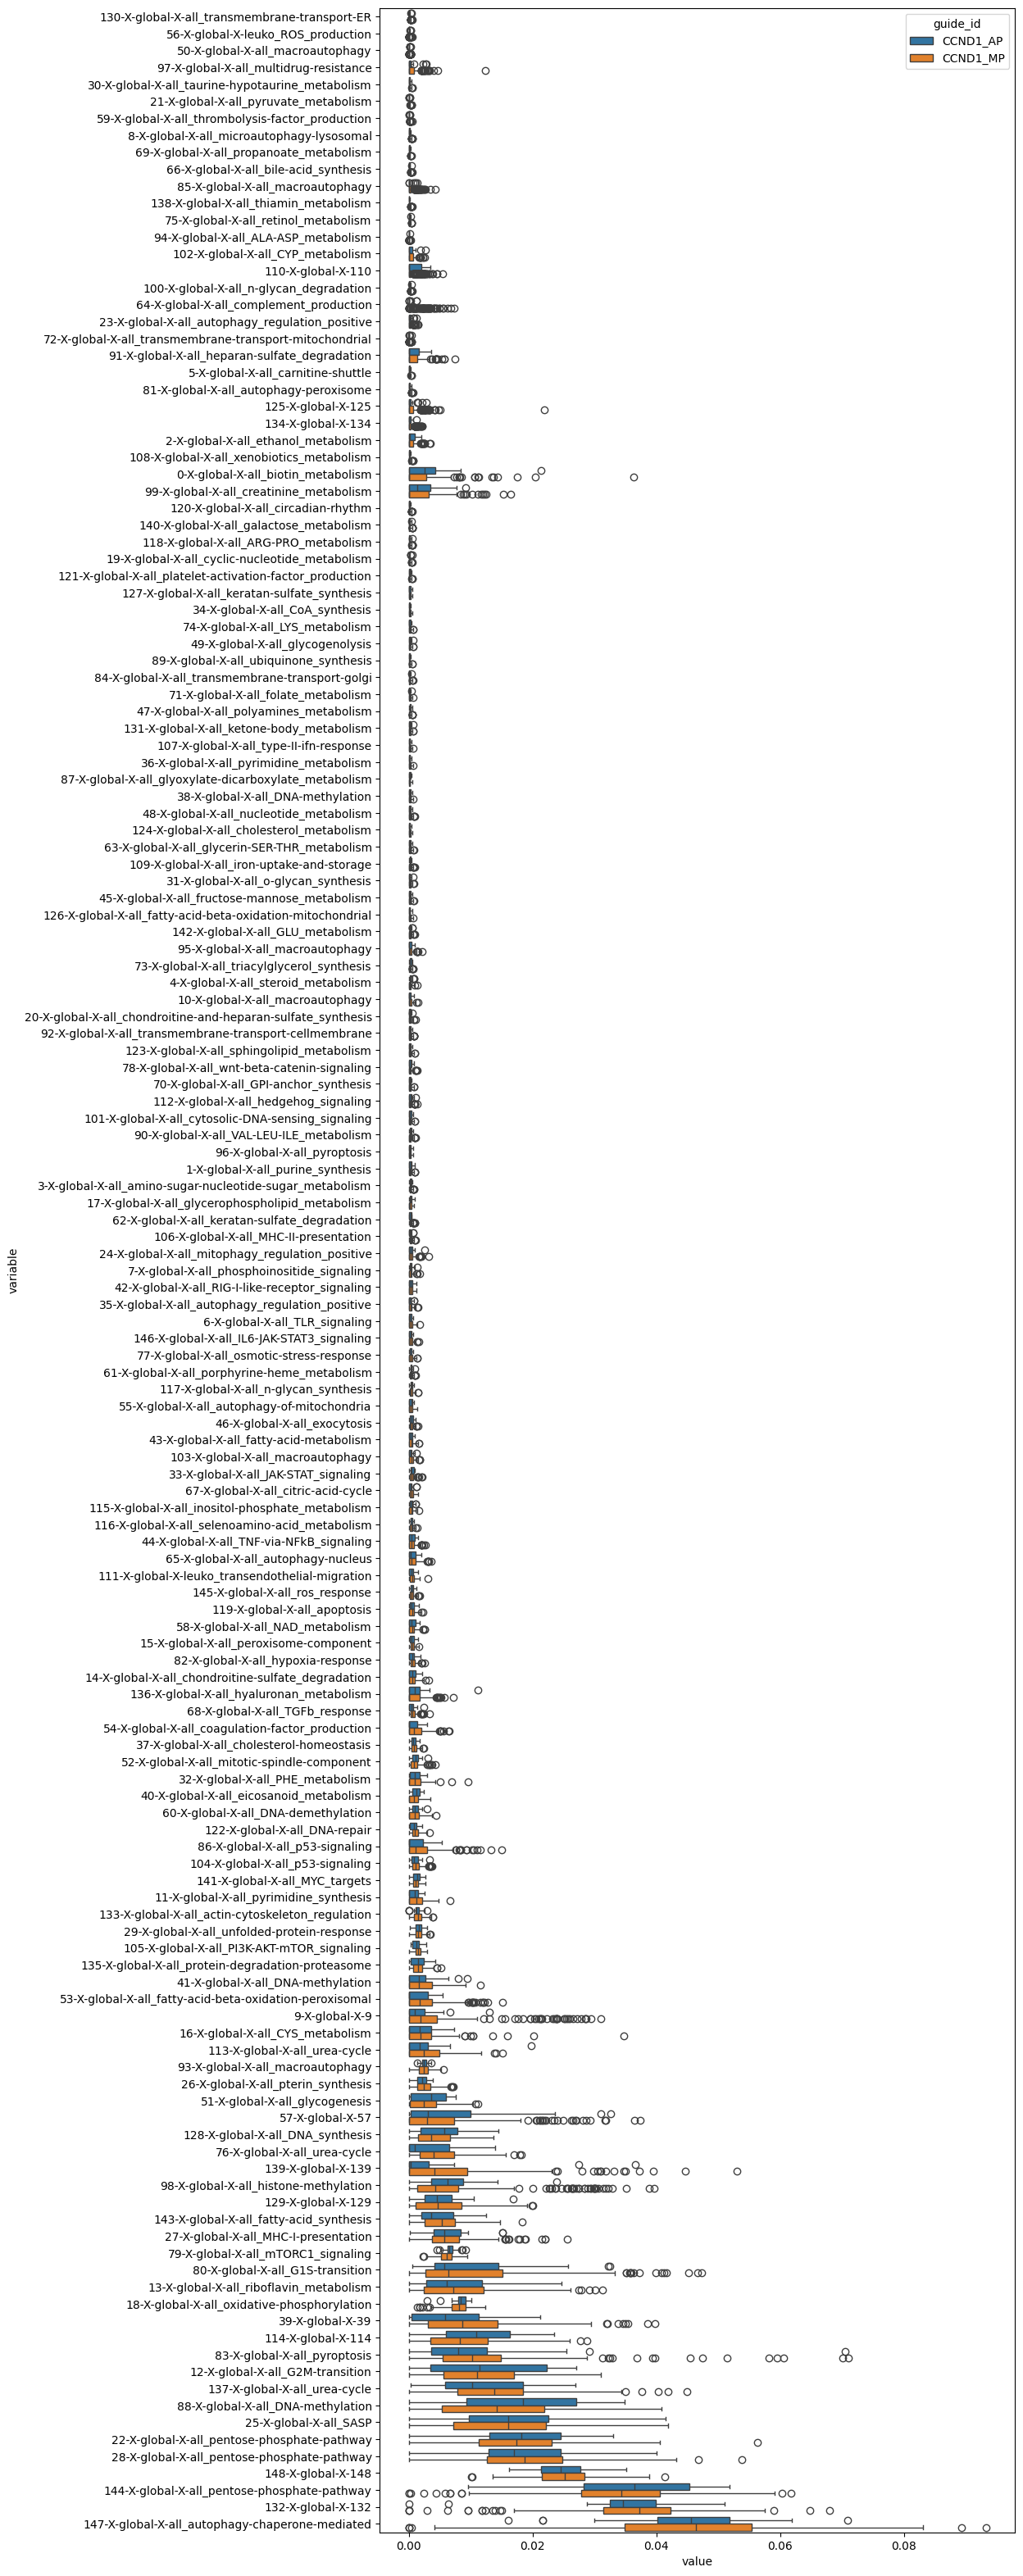

In [41]:
#plot the spectra scores for the ESR1_P1, ESR1_P2 and nontargeting
fig, ax = plt.subplots(1,1, figsize=(10,40))
dataframe_spectra_esr1_melt=pd.melt(dataframe_spectra_gene, id_vars=["guide_id"], value_vars=dataframe_spectra_columns)
grouped = dataframe_spectra_esr1_melt.loc[:,['value', 'variable']].groupby(['variable']).median().sort_values(by='value')
sns.boxplot(data=dataframe_spectra_esr1_melt,y= "variable", x= "value",hue="guide_id",ax=ax,order=grouped.index)
#do

plotting factor: 80-X-global-X-all_G1S-transition


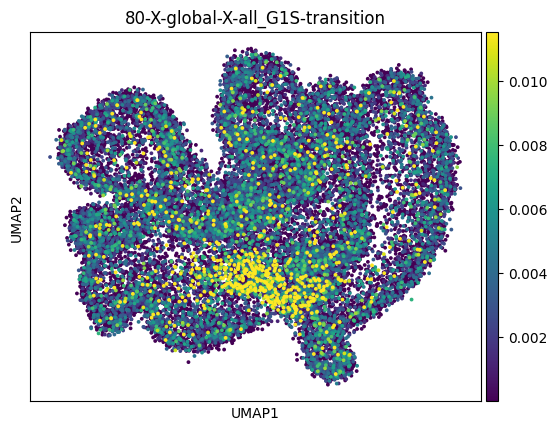

In [42]:
#visualize factor cell scores (this is poorly fitted bc we only ran 2 epochs)
# factor_of_interest = adata.uns['SPECTRA_overlap'].index[80]
factor_of_interest ="80-X-global-X-all_G1S-transition"
print('plotting factor:',factor_of_interest)

#add cell scores to obs
cell_scores = adata.obsm['SPECTRA_cell_scores'][:,0].astype(float)
adata.obs[factor_of_interest] = cell_scores
sc.pl.umap(adata,color=factor_of_interest,s=30,vmax=np.quantile(cell_scores,0.98))

<Axes: >

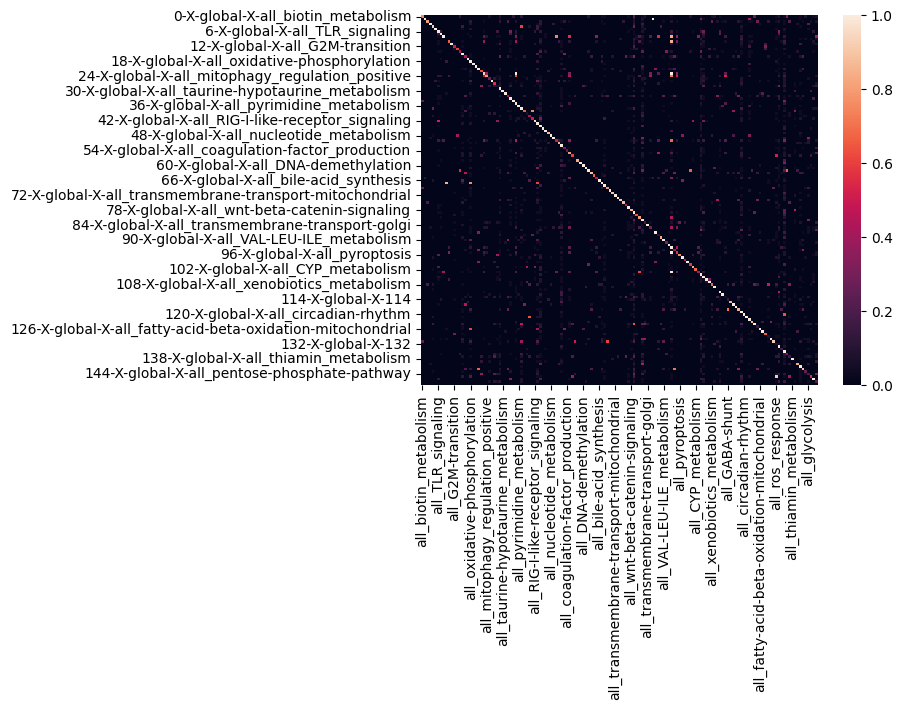

In [43]:
factors = adata.uns['SPECTRA_factors'] # factors x genes matrix that tells you how important each gene is to the resulting factors
markers = adata.uns['SPECTRA_markers'] # factors x n_top_vals list of n_top_vals top markers per factor
cell_scores = adata.obsm['SPECTRA_cell_scores'] # cells x factors matrix of cell scores
vocab = adata.var['spectra_vocab'] # boolean matrix of size # of genes that indicates the set of genes used to fit spectra 
sns.heatmap(adata.uns['SPECTRA_overlap']) # overlap matrix of size factors x factors that tells you how much each factor overlaps with each other factor

/Users/helenking/anaconda3/envs/apu/lib/python3.12/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


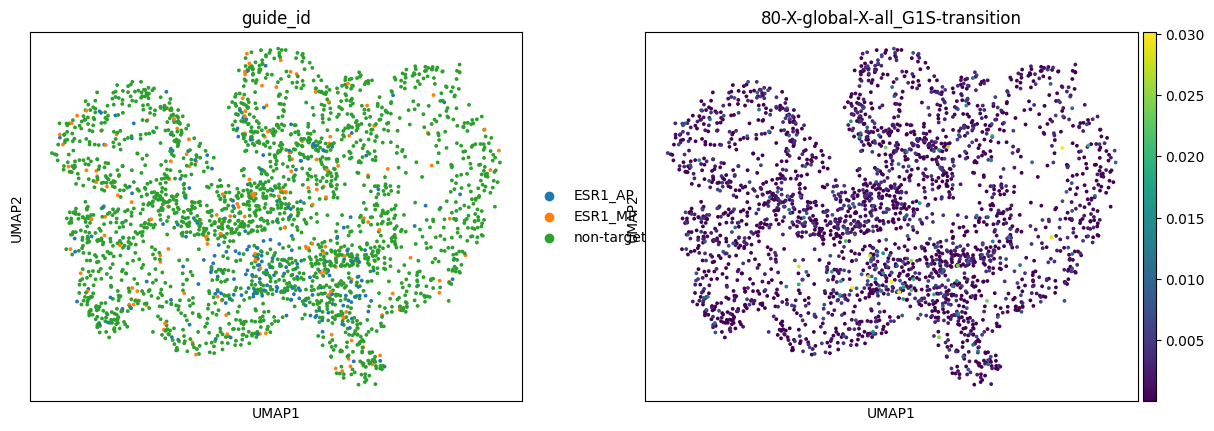

In [44]:
#subset esr1 only
adata_esr1 = adata[adata.obs["guide_id"].isin(["ESR1_MP","ESR1_AP","non-targeting_Control"])]
#plot
sc.pl.umap(adata_esr1,color=["guide_id","80-X-global-X-all_G1S-transition"],s=30,vmax=np.quantile(cell_scores,0.98))